In [1]:
import matplotlib.pyplot as plt

In [2]:
class GameOfLife(object):  

    def __init__(self, x_dim, y_dim):
        
        # Initialize life_grid as a 2D list filled with zeros. 
        # The dimensions of the grid are x_dim rows by y_dim columns.
        self.life_grid = [[0 for _ in range(y_dim)] for _ in range(x_dim)]
    
    def get_grid(self):
        
        # Return the grid.
        return self.life_grid
    
    def print_grid(self):
        
        # Iterate through each row in the grid
        for i in range(len(self.life_grid)):
            # For each cell in the current row, print its value followed by a pipe character
            # 'end = ' ' ensures that each cell value in a row is printed on the same line
            for j in range(len(self.life_grid[i])):
                print(self.life_grid[i][j], '|', end = ' ')
            # After printing all cell values in a row, print a newline character
            print()
            # Print a dashed line to visually separate the rows
            print('- '*6)

    def populate_grid(self, coord):

        # Loop through each set of coordinates
        for i in coord: 
            # Set the value at the specific coordinates (i[0], i[1]) in the life_grid to 1. 
            # This represents that the cell at these coordinates is alive.
            self.life_grid[i[0]][i[1]] = 1
        
        # Return the updated life_grid with the designated cells set to 1, representing live cells.
        return self.life_grid
            
    def make_step(self):
        
        # Get the number of rows in the life_grid list
        rows = len(self.life_grid)
        
        # Get the number of columns in the life_grid list
        columns = len(self.life_grid[0])
        
        # Initialize a variable to temporarily store the sum of a cell's neighboring cells
        temp_sum = 0.0
        
        # Create a new grid with the same dimensions as life_grid to store the sum of neighbors for each cell
        sum_grid = [[0 for i in range(columns)] for _ in range(rows)]
        
        # Iterate over each cell in the grid
        for i in range(rows):
            for j in range(columns):
                
                # Iterate over each of the cell's neighbors (including diagonally adjacent cells)
                for a in [i-1, i, i+1]:
                    for b in [j-1, j, j+1]:
                        # Do not include the cell itself in the sum of its neighbors
                        if a == i and b == j:
                            pass
                        else:
                            # If the neighbor is within the grid boundaries, add its value to the temporary sum
                            if 0 <= a < rows and 0 <= b < columns:
                                temp_sum += self.life_grid[a][b]
                            else:
                                pass
                            
                # Store the sum of a cell's neighbors in the corresponding position in sum_grid
                sum_grid[i][j] = temp_sum
                
                # Reset the temporary sum to 0 for the next cell
                temp_sum = 0.0
        
        # Iterate over each cell in the grid once more, this time to update the state of each cell
        for i in range(rows):
            for j in range(columns):
                # If the current cell is alive and has less than 2 or more than 3 live neighbors
                if self.life_grid[i][j] == 1:
                    if sum_grid[i][j] <= 1 or sum_grid[i][j] >= 4:
                        # The cell dies
                        self.life_grid[i][j] = 0
                    else:
                        pass
                 # If the current cell is dead and has exactly 3 live neighbors
                else:
                    if sum_grid[i][j] == 3:
                        # The cell becomes alive
                        self.life_grid[i][j] = 1
                    else:
                        pass
        
        # Return the updated grid
        return self.life_grid
    
    def make_n_steps(self, n):

        # Iterate 'n' times, invoking the make_step function at each iteration to evolve the grid
        for i in range(n):
            self.make_step()
            
        # Return the updated grid after 'n' steps have been performed
        return self.life_grid
    
    def draw_grid(self):
        
        # Get the number of rows and columns in the life_grid
        rows = len(self.life_grid) 
        columns = len(self.life_grid[0])
        
        # Initialize empty lists to hold the x and y coordinates for the plot
        x = []
        y = []
        
        # Populate the coordinate lists:
        # For each cell in the grid, append the row number to x and column number to y
        for i in range(columns):
            for j in range(rows):
                x.append(j)
                y.append(i)
        
        # Create a new figure with specified size
        fig, ax = plt.subplots(figsize=(9, 9))
        
        # Plot the state of each cell as a colored square marker on the scatter plot
        # Alive cells (value=1) and dead cells (value=0) will be colored differently
        plt.scatter(x, y, s = 150, c = self.life_grid, edgecolors = '#000000', marker = 's')
        
        # Set the axis limits to properly contain the grid
        plt.xlim(-1, rows)
        plt.ylim(-1, columns)
        
        # Invert the y-axis so that the plot visually matches the printed version of the grid
        ax.invert_yaxis()
        
        # Display the plot
        plt.show()

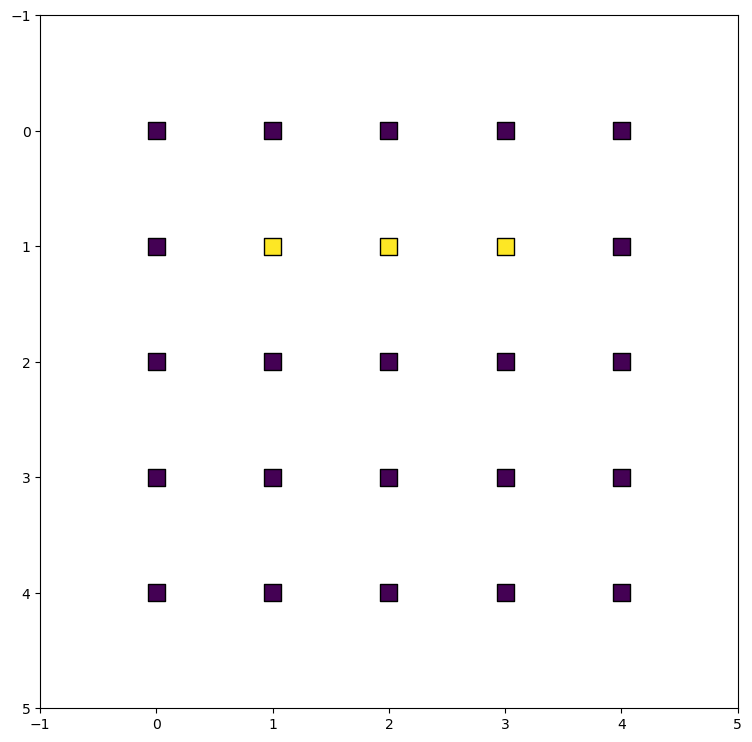

In [3]:
game = GameOfLife(5, 5)
game.populate_grid([[1,1], [1,2], [1,3]])
game.draw_grid()